# <div style=" text-align: center; font-weight: bold">Phase 02: Preprocessing data</div>

This is the preprocessing phase for data of the real estates for sale.

## **1. Import necessary Python modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# !pip install unicodedata
import unicodedata
import seaborn as sns

## **2. Explore the data**

### **2.1 Read the data from file**:

In [2]:
real_estate_for_sale_df = pd.read_csv('../Data/real_estate_for_sale.csv', encoding='utf-8')
real_estate_for_sale_df.head()

,Address,Type,Area,Price,Bedroom,Toilet,Floor,Furniture,Direction,Legal,Posting date,Expiry date,Ad type,Ad code
0,"Dự án Vinhomes Grand Park, Phường Long Thạnh M...",Căn hộ chung cư,47 m²,"1,9 tỷ",2 phòng,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,2/5/2025,9/5/2025,Tin VIP Kim Cương,42438234
1,"Dự án Vinhomes Grand Park, Phường Long Thạnh M...",Căn hộ chung cư,47 m²,"1,9 tỷ",2 phòng,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,2/5/2025,9/5/2025,Tin VIP Kim Cương,42438234
2,"Dự án Vinhomes Grand Park, Phường Long Thạnh M...",Căn hộ chung cư,47 m²,"1,9 tỷ",2 phòng,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,2/5/2025,9/5/2025,Tin VIP Kim Cương,42438234
3,Dự án The Beverly Solari - Vinhomes Grand Par...,Căn hộ chung cư,90 m²,Thỏa thuận,3 phòng,NaN,NaN,NaN,NaN,NaN,24/04/2025,9/5/2025,Tin VIP Kim Cương,42818062
4,"Dự án Lumiere Boulevard, Phường Long Bình, Quậ...",Căn hộ chung cư,75 m²,"4,5 tỷ",2 phòng,NaN,NaN,NaN,NaN,Hợp đồng mua bán,4/5/2025,4/5/2025,Tin thường,42581902


### **2.2 Some overview**:
#### **2.2.1 Num of rows and columns:**

In [70]:
num_rows, num_cols = real_estate_for_sale_df.shape

print(f'Num of rows:  {num_rows}')
print (f'Num of columns:  {num_cols}')

Num of rows:  14836
Num of columns:  14


#### **2.2.2 The meaning of each line. Is there any line with differenct meaning?**

- The data we used here is collected by crawling raw data from the website https://batdongsan.com.vn/        
- Each line is a record of a advertisement of real estate for sale. So there isn't any line that has different meaning.

#### **2.2.3 Num of duplicated rows:**

In [71]:
duplicate = real_estate_for_sale_df.duplicated().sum()

print (f' Nums of duplicated rows: {duplicate}')

 Nums of duplicated rows: 1911


We can see that there are duplicated rows in the dataset. The reasons here are some advertisements could be reposted in the website, or some errors during the data-collecting process may lead to the duplicated data.      
So, we will drop these duplicated rows, then reset the index of the dataframe.

In [72]:
real_estate_for_sale_df.drop_duplicates(inplace= True)
real_estate_for_sale_df = real_estate_for_sale_df.reset_index(drop=True)

#### **2.2.4 Ratio of missing values for each column:**
Next, we will find the missing ratio for each column in the dataset. This is necessary to determine the next steps we should do.

In [73]:
# Finf the missing value
def missing_ratio(column):
    missing_values = column.isnull().sum()
    total_values = len(column)
    return (missing_values / total_values) * 100

missing_ratios_df = real_estate_for_sale_df.agg(missing_ratio).to_frame()
missing_ratios_df.columns = ['Missing ratio']

missing_ratios_df

,Missing ratio
Address,0.000000
Type,0.000000
Area,0.007737
Price,0.000000
Bedroom,32.758221
Toilet,49.996132
Floor,55.350097
Furniture,52.719536
Direction,76.355899
Legal,28.742747


- We can see that the fields `Address`, `Type`, `Price`, `Posting date`, `Expiry date`, `Ad type`, `Ad code` have no missing values. This is easy to understand the reasons: The `Address`, `Type` and `Price` is the basic data that a post have to contain. And three orther fields is the data that auto generated by the website.

- Beside that, fields like `Bedroom`, `Toilet`, `Floor`, `Furniture` are more special. The dataset contain many types of real easte, including categories such as `Đất nền dự án`, `Đất bán`, `Trang trại, khu nghỉ dưỡng`, these types of real easte may not have the information of above fields. So it is reasonable to expect that these fields will have missing values. We will consider it more clearly in the next part.

- The remaining fields have a large ratio of missing value. from *31.176588 %* in `Legal` up to *78.23849 %* in `Direction`. So the data preprocessing of data is so necessary before we make the analysis.

### **2.3 The meaning of each columns**
Let's see all the columns currently in the dataset.

In [74]:
real_estate_for_sale_df.columns.to_list()

['Address',
 'Type',
 'Area',
 'Price',
 'Bedroom',
 'Toilet',
 'Floor',
 'Furniture',
 'Direction',
 'Legal',
 'Posting date',
 'Expiry date',
 'Ad type',
 'Ad code']

- `Address`: address of the real estate. With the real estate is apartment, the address can also contain the Project of the real estate.
- `Type` : the category of the real estate.
- `Area`: the area of the real estate.
- `Price`: the price of the real estate. It can be the total price or just the price per m2.
- `Bedroom`: number of bedroom in the real estate.
- `Toilet`: number of toilet in the real estate.
- `Floor`: number of floor.
- `Furniture`: the furniture status of the real estate.
- `Direction`: the direction of the real estate.
- `Legal`: Some legalities of the real estate.
- `Posting date`: The day that the advertisement was posted.
- `Expiry date`: the day the real estate was enable.
- `Ad type`: the type of advertisement.
- `Ad code`: the code of advertisement.

#### **2.3.1 Data type of each colmuns:**
Now, let's check the data type of each column

In [75]:
cols_type = real_estate_for_sale_df.dtypes
cols_type

Address         object
Type            object
Area            object
Price           object
Bedroom         object
Toilet          object
Floor           object
Furniture       object
Direction       object
Legal           object
Posting date    object
Expiry date     object
Ad type         object
Ad code          int64
dtype: object

- Nearly all of the columns is in Object type. These columns will not suitable for the further analysis. So we need to do some preprocessing on the data types.
- `Area`, `Price`, `Bedroom`, `Toilet` and `Floor` should be numerical columns, so we will convert them into numeric data types.
- `Posting date` should be in `datetime` type
- `Expiry date`, `Ad type`, `Ad code` is not so meaningful for our analysis, so we should remove it later.

After some overview about the dataset, let's make some cleaning on it.
### **2.4 Preprocessing for numeric columns:**

#### **2.4.1. Area:**
First, let's make some quick view to this column:

In [76]:
real_estate_for_sale_df['Area'].to_frame()

,Area
0,47 m²
1,90 m²
2,75 m²
3,28 m²
4,80 m²
...,...
12920,60 m²
12921,68 m²
12922,60 m²
12923,382 m²


The column could contain many formats of area value, also the unit could not be consistent. We need to find that if the values is in the same unit?

In [77]:
area_values = real_estate_for_sale_df[real_estate_for_sale_df['Area'].notna()]['Area'].to_list()
unit_list = []

# Extract the unit of each area.
for area in area_values:
    unit_list.append(area.split(' ')[1])

set(unit_list)

{'m²'}

So we can see that all the values in columns `Area` is in the `m²` unit. Now we have to change the datas into the right format, then convert them to `float`. Finally, rename the column for a clearly meaning.
Look through the data in `Area` column, there just a unconsistent between the use of `,` and `.` in the values. The reason here is the `Price` is updated base on the data the was given by the users, so that lead to many diffrents format of value. Finally, I find out all the pattern here:
- 1,233.4
- 344.4
- 334,4
- 1.344

For each pattern, we will treat it differently, let's see the function below:

In [78]:

def clean_area(area):
    
    if pd.isna(area):
        return area
    
    area = area.split(' ')[0]
    # Handle 1,233.4 case, convert it into 1233.4
    if (',' in area) and ('.' in area):
        cleaned_area = area.replace('.', '').replace(',', '.')

    # Case 334,4 -> 334.4
    elif ',' in area:
        
        cleaned_area = area.replace(',', '.')
    else:
        # print (area)
        cleaned_area = area
    
    # Case 1.344 -> 1344
    if '.' in area:
        count = len(area.split('.')[-1])
        if count == 3:
            cleaned_area = area.replace('.', '')
    
    return cleaned_area

real_estate_for_sale_df.loc[:,'Area'] = real_estate_for_sale_df.loc[:,'Area'].apply(clean_area)
real_estate_for_sale_df['Area'] = real_estate_for_sale_df['Area'].astype('float64')

# Drop the area that is nan
real_estate_for_sale_df = real_estate_for_sale_df[real_estate_for_sale_df['Area'].notna()]
real_estate_for_sale_df.rename(columns={'Area': 'Area(m2)'}, inplace=True)

#### **2.4.2 Price:**
With `Price ` column, at first, we will find that if the values is in the same unit.

In [79]:

price_values = real_estate_for_sale_df['Price'].to_list()

unit_list = []
value_list = []
for price in price_values:
    unit_list.append(price.split(' ')[1])
    value_list.append(price.split(' ')[0])

set(unit_list)

{'nghìn', 'nghìn/m²', 'thuận', 'triệu', 'triệu/m²', 'tỷ', 'tỷ/m²'}

The `Price` column contains various units, so we will convert them all to the `VNĐ` unit. With the price is `Thỏa thuận`, we will replace them with `NaN`

In [80]:
# raise ExceptionGroup("NotImplemented")
def update_price(price, area):
    new_price = 0

    if 'nghìn/m²' in price:
        new_price = float(price.split(' ')[0]) * area

    elif 'triệu' in price:
        new_price, unit = price.split(' ')
        if unit.strip() == 'triệu':
            new_price = float(new_price.replace(',', '.'))
            new_price *= 1000000
        elif unit.strip() == 'triệu/m²':
            new_price = float(new_price.replace(',', '.'))
            new_price *= area * 1000000

    elif 'tỷ' in price:
        new_price, unit = price.split(' ')
        if unit.strip() == 'tỷ/m²':
            new_price = float(new_price.replace(',', '.'))
            new_price *= area * 1000000000
        else:
            new_price = float(new_price.replace(',', '.'))
            new_price *= 1000000000
   
    return "{:0,.2f}".format(new_price) if new_price != 0 else np.nan


real_estate_for_sale_df['Price'] = real_estate_for_sale_df.apply(lambda row: update_price(row['Price'], row['Area(m2)']), axis=1)

real_estate_for_sale_df.rename(columns={'Price': 'Price(VNĐ)'}, inplace=True)


#### **2.4.3 Bedroom, Toilet, Floor:**
With all three columns, we find that there are similiraties between them, so we can process all of them once.

In [81]:

column_list = ['Bedroom', 'Toilet', 'Floor']
unit_dict = {}

# Extract the value and unit into list, then store them into a dictionary
for column in column_list:
    column_mask = real_estate_for_sale_df[column].notna()
    column_values = real_estate_for_sale_df.loc[column_mask, column]
    
    unit_list = []
    value_list = []
    
    for value in column_values:
        unit_list.append(value.split(' ')[1])
        value_list.append(value.split(' ')[0])
    
    unit_dict[column] = (set(unit_list), column_mask, value_list)

for key, value in unit_dict.items():
    print(key, value[0])


Bedroom {'phòng'}
Toilet {'phòng'}
Floor {'tầng'}


We can see that all the values in three columns are in the same unit, and values is just can be the integer, so we just convert them to float(because of NaN), then rename the column

In [82]:
# Set the new value and convert the data type into float
for key, value in unit_dict.items():
    real_estate_for_sale_df.loc[value[1], key] = value[2]
    real_estate_for_sale_df[key] = real_estate_for_sale_df[key].astype('float64')


In [83]:
real_estate_for_sale_df.rename(columns={'Bedroom': 'Bedroom(Phòng)'}, inplace=True)
real_estate_for_sale_df.rename(columns={'Toilet': 'Toilet(Phòng)'}, inplace=True)
real_estate_for_sale_df.rename(columns={'Floor': 'Floor(Tầng)'}, inplace=True)

Up to now, we have finished the preprocessing for the numeric columns, now move to the categorical columns

### **2.5 Preprocessing for categorical columns:**
#### **2.5.1 Addresss:**

- With the `Address` column, there is some thing we can dicuss here:
    - The fully address is does not really meaningfull for my analysis. The base idea is that all the real estate is located in `Ho Chi Minh City`, so we can extract the district of the real estate.
    - In many real estates, the address also contain the project they belong to. So we could also extract the project for further analysis.

##### **Extract the district of real estates:**

In [84]:
def extract_district(address):
    split = address.split(',')
    if 'Hồ Chí Minh' in split[-1] or 'TP.HCM' in split[-1]:
        try:
            district = split[-2].strip()
        except:
            split = address.split(' ')
            district = split[-5] + " " + split[-4]
        
        # Define some possible prefix for the district value
        prefix_list = ['quận', 'huyện', 'thành phố', 'q.', 'TP.']
        for prefix in prefix_list:
            if district.lower().strip().startswith(prefix.lower()):
                district = district[len(prefix):].strip()
                
    else:
        district = "Không"
    
    if 'Phường' in district or len(district) == 0:
        district = "Không"
    
    return district

Then, create a new column named `District` and store values into it. Also, we will eliminate all the real estate which we can extract `District` information.

In [85]:

real_estate_for_sale_df.loc[:,'District'] = real_estate_for_sale_df['Address'].apply(extract_district)

real_estate_for_sale_df = real_estate_for_sale_df[real_estate_for_sale_df['District'] != 'Không']

real_estate_for_sale_df['District'].value_counts()

District
2             1422
7             1241
9             1088
Bình Thạnh    1084
Tân Bình       762
Thủ Đức        743
Gò Vấp         710
Tân Phú        699
1              687
Bình Tân       546
10             488
3              482
Phú Nhuận      414
Nhà Bè         405
Bình Chánh     386
12             379
8              309
4              265
6              206
Củ Chi         179
11             143
5              139
Hóc Môn         86
Cần Giờ         55
Name: count, dtype: int64

In the data above, Ho Chi Minh City has 24 districts, but currently, the 2 district and 9 district is merded with Thu Duc District inrto Thu Duc City. In this analysis, we will ignored the change in the current time.

##### **Extract the project of real estates:**
This process is more simple, the `Project` is marked just by the keyword `Dự án` so we can easily detect them.

In [86]:
def extract_project(address):
    if 'Dự án' in address:
        return address.split(',')[0]
    else:
        return 'Không'

In [87]:
real_estate_for_sale_df.loc[:, 'Project'] = real_estate_for_sale_df['Address'].apply(extract_project)

#### **2.5.2 Furniture:**

- With the `Furniture` columns, the furniture status is given and describled by the customers. So there are many type of the furnitures. But we will use some simple status like `Không nội thất`, `Cơ bản`, `Đầy đủ`, `Cao cấp`, `Khác`. We will categorize all the values of this column to these types.        
- We got the problem with the natural language, Unicode characters can be represented in different forms, so I use `unicodedata` to normalize all the data to a consistent form

In [88]:
# Just define some key word for each level of furniture
deluxe_furniture_keywords = ["cao cấp", "ntcc", "sang", "5 sao", "nhập khẩu", "hiện đại", "đạt chuẩn"]
fully_furniture_keywords = ["đủ", "full", "tặng", "toàn bộ", "hoàn chỉnh", "hoàn thiện", "đẹp", "đã làm", "mới"]
basic_furniture_keywords = ["cơ bản", "ít", "ntcb", "có", "ok", "dính tường", "căn bản"]
none_furniture_keywords = ["thô", "trống", "không", "ko"]

# Funtion to normalize the data.
def normalize_text(text):
    if pd.isnull(text):
        return "Không có thông tin"
    # Normalize to NFC form
    normalized_text = unicodedata.normalize('NFC', text.lower())
    return normalized_text


def clean_furniture(furniture):
    if pd.isnull(furniture):
        return "Không có thông tin"
  
    normalized_furniture = unicodedata.normalize('NFC', furniture.lower())

    # Find and set the funiture status based on the keywords
    if any(keyword in normalized_furniture for keyword in deluxe_furniture_keywords):
        return "Nội thất sang trọng"
    elif any(keyword in normalized_furniture for keyword in fully_furniture_keywords) or len(normalized_furniture.split(',')) >= 4:
        return "Nội thất đầy đủ"
    elif any(keyword in normalized_furniture for keyword in basic_furniture_keywords) or 2 <= len(normalized_furniture.split(',')) < 4:
        return "Nội thất cơ bản"
    elif any(keyword in normalized_furniture for keyword in none_furniture_keywords):
        return "Không nội thất"
    else:
        return "Khác"

real_estate_for_sale_df['Furniture'] = real_estate_for_sale_df['Furniture'].apply(clean_furniture)


In [89]:
real_estate_for_sale_df['Furniture'].value_counts()

Furniture
Không có thông tin     6811
Nội thất đầy đủ        3874
Nội thất cơ bản        1619
Không nội thất          309
Nội thất sang trọng     258
Khác                     47
Name: count, dtype: int64

#### **2.5.3 Legal:**

With the `Legal` column, there will be categories below:
- `Sổ đỏ và Sổ hồng`
- `Sổ hồng`
- `Sổ đỏ`
- `Hợp đồng mua bán`
- `Đang chờ sổ`
- `Khác`

For `NaN` values, I will replace by `Không có thông tin`

In [90]:

full_legal_keywords = [ "sổ đỏ/ sổ hồng","có sổ", "đầy đủ", "sang", "chuẩn", "rõ ràng", "ok"]
only_land_keywords = ["sổ đỏ"]
only_house_keywords = ["sổ hồng", "shr"]
contract_keywords = ["hợp đồng", "hđmb"]
waiting_keywords = ["chờ"]


def clean_legal(legal):
    if pd.isnull(legal):
        return "Không có thông tin"

    normalized_legal = unicodedata.normalize('NFC', legal.lower())
    
    # Set legality status based on the keywords
    legal = normalized_legal.lower().strip()
    if any(keyword in legal for keyword in full_legal_keywords):
        return 'Sổ đỏ và sổ hồng'
    elif any(keyword in legal for keyword in only_land_keywords):
        return 'Sổ đỏ'
    elif any(keyword in legal for keyword in only_house_keywords):
        return'Sổ hồng'
    elif any(keyword in legal for keyword in contract_keywords):
        return 'Hợp đồng mua bán'
    elif any(keyword in legal for keyword in waiting_keywords):
        return 'Đang chờ sổ'
    else:
        
        return 'Khác'

In [91]:
real_estate_for_sale_df['Legal'] = real_estate_for_sale_df['Legal'].apply(clean_legal)
real_estate_for_sale_df['Legal'].value_counts()


Legal
Sổ đỏ và sổ hồng      7298
Không có thông tin    3713
Hợp đồng mua bán      1108
Sổ hồng                496
Đang chờ sổ            184
Sổ đỏ                   64
Khác                    55
Name: count, dtype: int64

#### **2.5.4 Posting date:**
We will convert this column to the `datetime` type

In [92]:
real_estate_for_sale_df['Posting date'] = pd.to_datetime(real_estate_for_sale_df['Posting date'], format = '%d/%m/%Y')

### **2.7 Delete unnecessary columns**:
We got some observation here:
- The `Direction` column, which have above 78 percent of missing data should be removed.
- The `Expiry date`, `Ad type`, `Ad code` that not contain meaningful data for analysis, also can be removed.
- The `Address` column, after extract all neccessary data, also become meaningless.
- In the `Type` column, the type that is `Shophouse, nhà phố thương mại`, `Trang trại, khu nghỉ dưỡng`, `Kho, nhà xưởng`, `Bất động sản khác` just contribute a little percentage in total, so we won't include them in our future analysis.

In [93]:
real_estate_for_sale_df['Type'].unique()

array(['Căn hộ chung cư', 'Nhà riêng', 'Nhà mặt phố', 'Đất bán',
       'Shophouse nhà phố thương mại', 'Nhà biệt thự, liền kề',
       'Kho, nhà xưởng', 'Đất nền dự án', 'Bất động sản khác', 'Condotel',
       'Trang trại, khu nghỉ dưỡng'], dtype=object)

In [94]:
deleted_types = ['Kho, nhà xưởng', 'Shophouse nhà phố thương mại', 'Trang trại, khu nghỉ dưỡng', 'Bất động sản khác']

real_estate_for_sale_df = real_estate_for_sale_df[~real_estate_for_sale_df['Type'].isin(deleted_types)]
real_estate_for_sale_df.drop(columns=['Direction', 'Expiry date', 'Ad type', 'Ad code', 'Address'], inplace= True)

### **2.8 Check for unreasonable data**
Now, let's check is the data is resonable

#### **2.8.1 Check for ouliers in data**

This is a necessary step in preprcessing data, a oulier can affect a lot to our future analysis

In [95]:
real_estate_for_sale_df.loc[:,'Price(VNĐ)'] = real_estate_for_sale_df.loc[:,'Price(VNĐ)'].str.replace(',', '')
real_estate_for_sale_df.loc[:,'Price(VNĐ)'] = pd.to_numeric(real_estate_for_sale_df['Price(VNĐ)'], errors='coerce')
real_estate_for_sale_df['Price(VNĐ)'] = real_estate_for_sale_df['Price(VNĐ)'].astype(float)

IndexError: index 6 is out of bounds for axis 0 with size 6

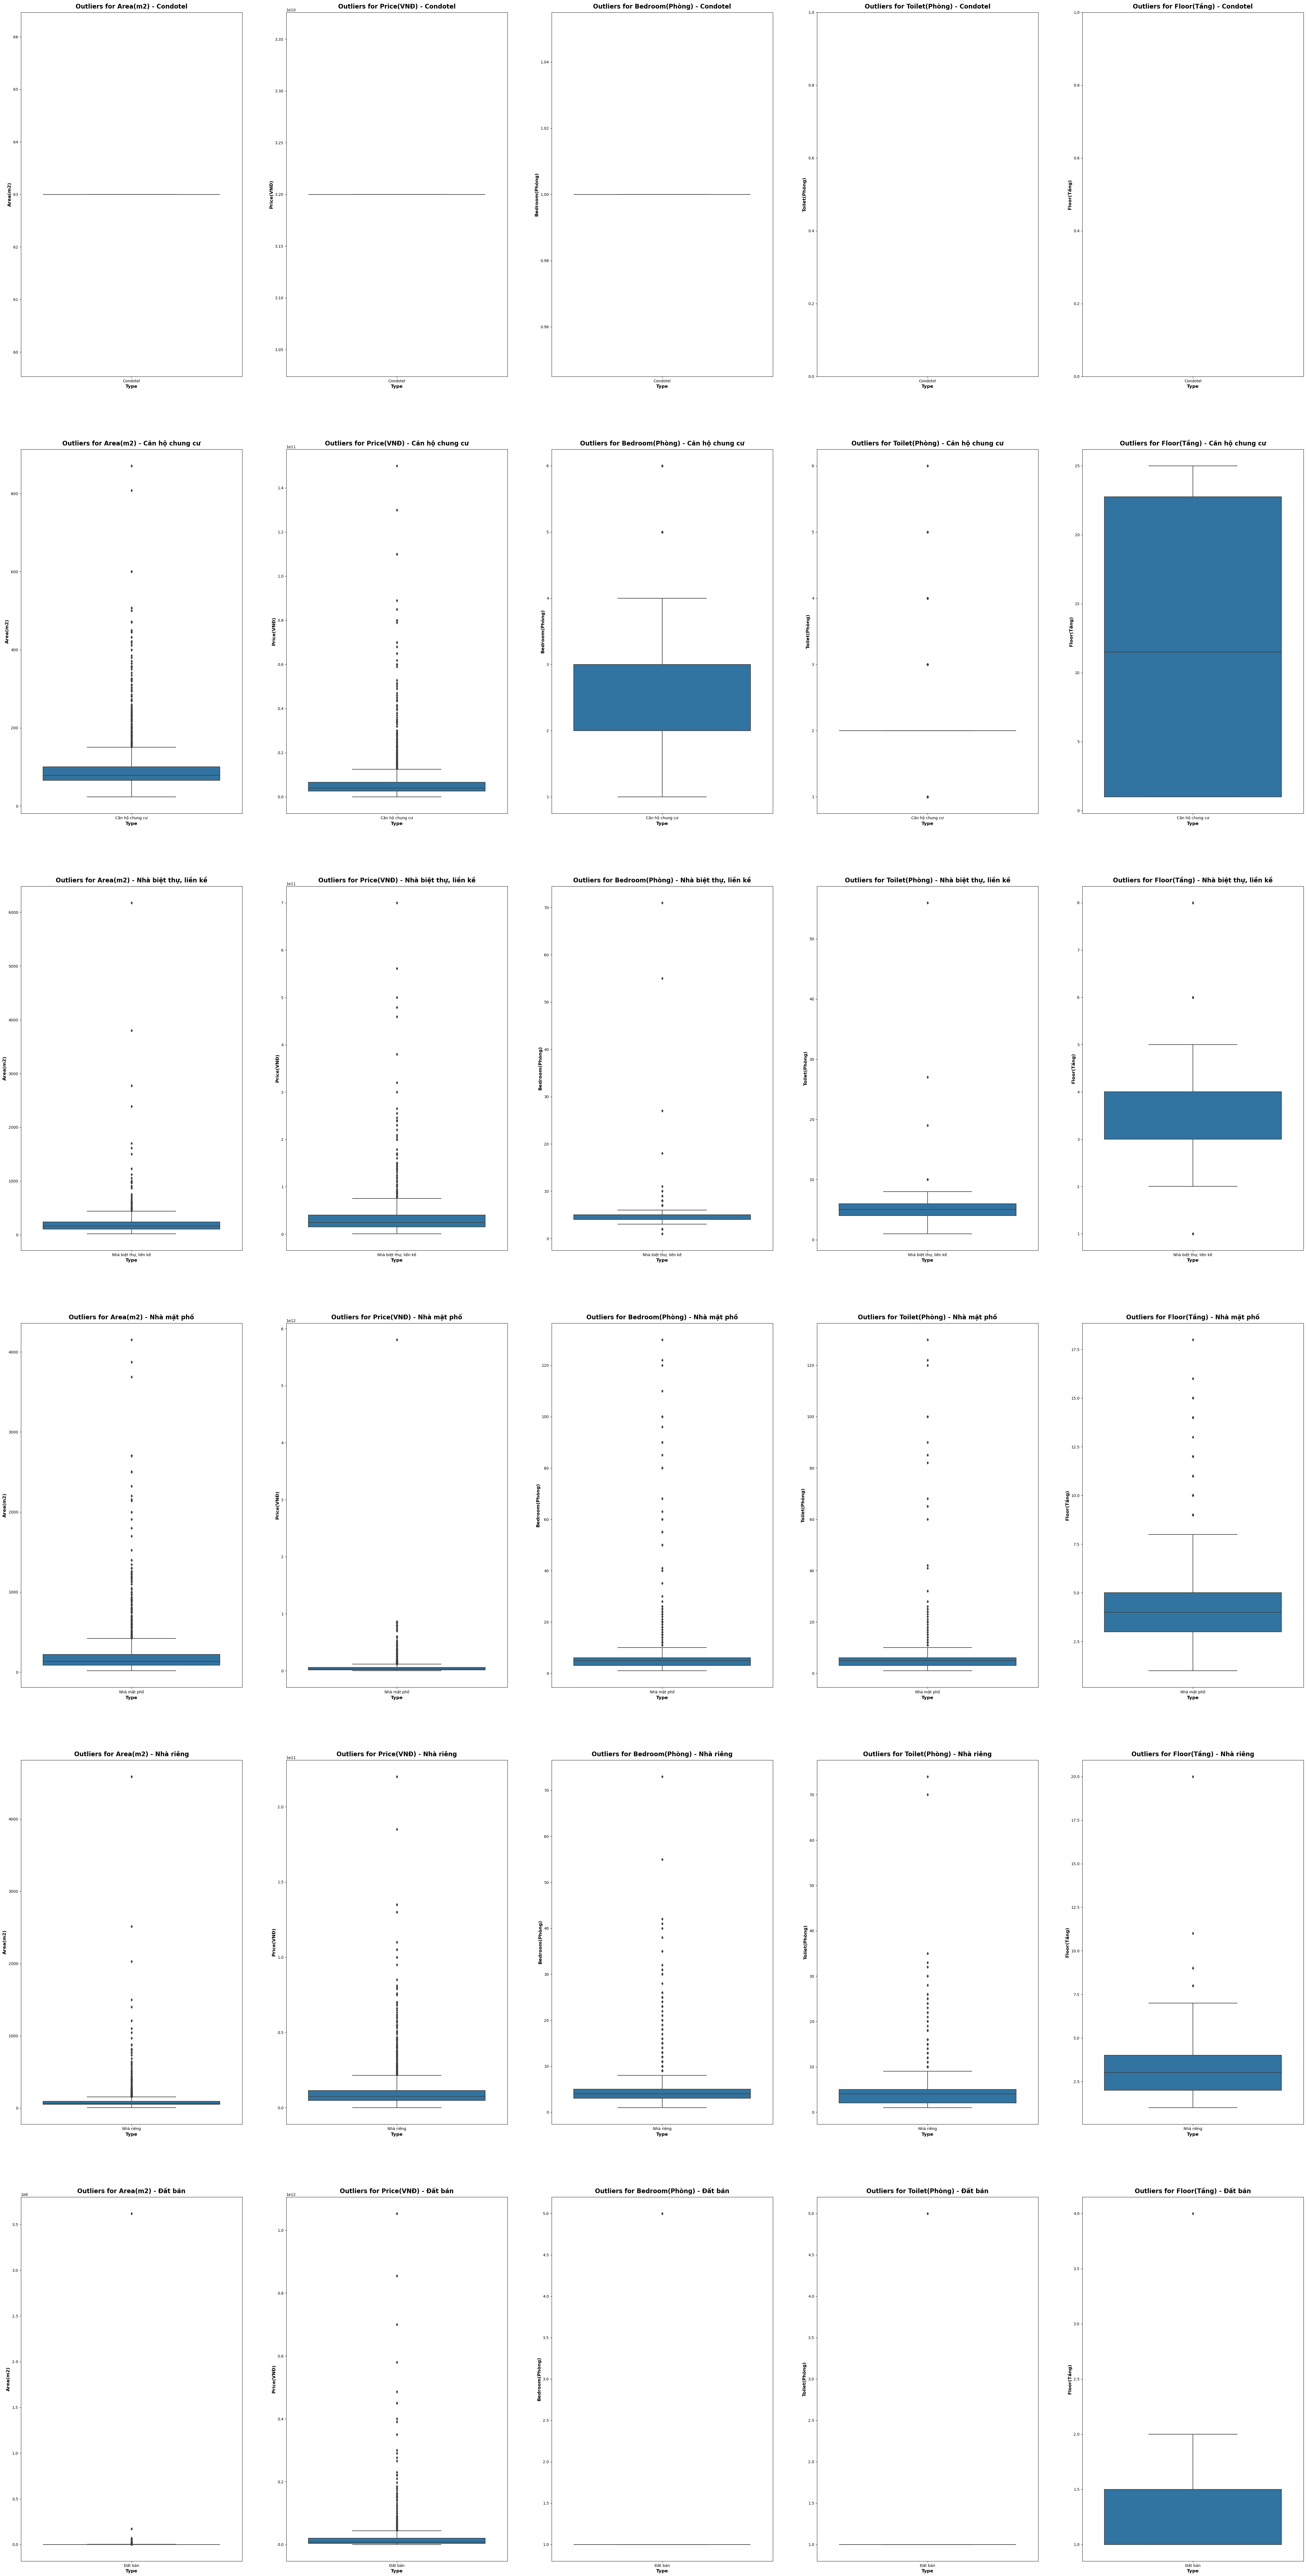

In [96]:
columns_to_plot = ['Area(m2)', 'Price(VNĐ)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)']
grouped_by_type_df = real_estate_for_sale_df.groupby('Type')
fig, axes = plt.subplots(nrows= 6, ncols=5, figsize=(60, 120))

index = 0
for key, data in grouped_by_type_df:
    for column in columns_to_plot:

        ax = axes[index // 5, index % 5]
        
        sns.boxplot(x = data['Type'], y = data[column].dropna(), ax = ax)
        ax.set_title(f"Outliers for {column} - {key}", fontsize = 16, fontweight = 'bold', pad = 10)
        ax.set_xlabel("Type", fontsize = 12, fontweight = 'bold')
        ax.set_ylabel(column, fontsize = 12, fontweight = 'bold')
        index += 1

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

By these box plot, we just see that here are lots of outliers that occur in our dataset. These outliers may have negative effects to our future analysis, also our model won't get a high performance. so, in the easiest way, we just drop all the ouliers.

First, let's take a look at the types `Đất bán` and `Đất nền dự án`, normally, these type will not have the value in column `Bedroom`, `Toilet` and `Floor`, so just keep all the samples in these type that have no value in these column 

In [61]:

filtered_df = real_estate_for_sale_df[real_estate_for_sale_df['Type'].isin(['Đất bán', 'Đất nền dự án']) &
                                        ((real_estate_for_sale_df['Bedroom(Phòng)'] > 0) |
                                        (real_estate_for_sale_df['Toilet(Phòng)'] > 0) |
                                        (real_estate_for_sale_df['Floor(Tầng)'] > 0))]

real_estate_for_sale_df.drop(filtered_df.index, inplace=True)

Okay, now we have remove all the outliers for the type `Đất bán` and `Đất nền dự án`, next, we will move to more complicated columns

- With other types, we can see that there are values that is more far from the medium. So will implement the way to detect and remove the ouliers for each real estate type.

In [97]:
columns_to_detect = ['Area(m2)', 'Price(VNĐ)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)']

cleaned_real_estate_df = real_estate_for_sale_df.copy()

for column in columns_to_detect:
    column_values = cleaned_real_estate_df[column].dropna().to_numpy()

    q1 = np.percentile(column_values, 25)
    q3 = np.percentile(column_values, 75)
    iqr = q3 - q1

    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    outliers_mask = (cleaned_real_estate_df[column] < lower_threshold) | (cleaned_real_estate_df[column] > upper_threshold)

    cleaned_real_estate_df = cleaned_real_estate_df[~outliers_mask]


### **2.6 Fill in the missing values**


First, check the missing ratio now

In [98]:

missing_ratios_df = cleaned_real_estate_df.agg(missing_ratio).to_frame()
missing_ratios_df

,0
Type,0.000000
Area(m2),0.000000
Price(VNĐ),7.091852
Bedroom(Phòng),25.188301
Toilet(Phòng),43.685807
Floor(Tầng),58.055365
Furniture,0.000000
Legal,0.000000
Posting date,0.000000
District,0.000000


As we discuss above, with the `Bedroom`, `Toilet`, `Floor` columns are not the attribute of some type of real estate. so with  `Đất nền dự án`, `Đất bán`, `Trang trại, khu nghỉ dưỡng` , the `Nan` will be replaced by -1, with the others, I also group it by the category and fill by the mean of each.

In [99]:
replace_nan_types = ['Đất nền dự án', 'Đất bán', 'Trang trại, khu nghỉ dưỡng']
columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)']

for col in columns:
    mask = cleaned_real_estate_df['Type'].isin(replace_nan_types)
    cleaned_real_estate_df.loc[mask, col] = cleaned_real_estate_df.loc[mask, col].fillna(-1)
    cleaned_real_estate_df.loc[~mask , col] = cleaned_real_estate_df.loc[ ~mask, col].fillna(round(cleaned_real_estate_df.loc[~mask, col].mean(),0))

In [100]:
missing_ratios_df = cleaned_real_estate_df.agg(missing_ratio).to_frame()
missing_ratios_df

,0
Type,0.000000
Area(m2),0.000000
Price(VNĐ),7.091852
Bedroom(Phòng),0.000000
Toilet(Phòng),0.000000
Floor(Tầng),0.000000
Furniture,0.000000
Legal,0.000000
Posting date,0.000000
District,0.000000


Finally, les't check out our dataset again

In [101]:
cleaned_real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10223 entries, 0 to 12924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Type            10223 non-null  object        
 1   Area(m2)        10223 non-null  float64       
 2   Price(VNĐ)      9498 non-null   float64       
 3   Bedroom(Phòng)  10223 non-null  float64       
 4   Toilet(Phòng)   10223 non-null  float64       
 5   Floor(Tầng)     10223 non-null  float64       
 6   Furniture       10223 non-null  object        
 7   Legal           10223 non-null  object        
 8   Posting date    10223 non-null  datetime64[ns]
 9   District        10223 non-null  object        
 10  Project         10223 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 958.4+ KB


The result look good, now stored it into a new file and begin something fun with it

### Save the processed data

In [102]:
cleaned_real_estate_df.to_csv("../Data/cleaned_real_estate_for_sale.csv", index= False)

In [103]:
cleaned_real_estate_df

,Type,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Furniture,Legal,Posting date,District,Project
0,Căn hộ chung cư,47.0,1.900000e+09,2.0,3.0,3.0,Không có thông tin,Sổ đỏ và sổ hồng,2025-05-02,9,Dự án Vinhomes Grand Park
1,Căn hộ chung cư,90.0,NaN,3.0,3.0,3.0,Không có thông tin,Không có thông tin,2025-04-24,9,Dự án The Beverly Solari - Vinhomes Grand Park
2,Căn hộ chung cư,75.0,4.500000e+09,2.0,3.0,3.0,Không có thông tin,Hợp đồng mua bán,2025-05-04,9,Dự án Lumiere Boulevard
3,Nhà riêng,28.0,3.600000e+09,2.0,3.0,3.0,Nội thất cơ bản,Sổ đỏ và sổ hồng,2025-05-04,7,Không
4,Nhà mặt phố,80.0,1.600000e+10,3.0,3.0,4.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2025-05-04,7,Không
...,...,...,...,...,...,...,...,...,...,...,...
12919,Nhà riêng,81.0,1.350000e+10,5.0,3.0,4.0,Nội thất cơ bản,Sổ đỏ và sổ hồng,2023-11-30,Thủ Đức,Không
12920,Nhà riêng,60.0,9.000000e+09,3.0,3.0,3.0,Nội thất cơ bản,Sổ đỏ và sổ hồng,2023-11-30,Thủ Đức,Không
12921,Nhà riêng,68.0,8.500000e+09,3.0,3.0,3.0,Không có thông tin,Sổ đỏ và sổ hồng,2023-11-28,Thủ Đức,Không
12922,Nhà riêng,60.0,9.000000e+09,5.0,6.0,4.0,Nội thất cơ bản,Sổ đỏ và sổ hồng,2023-11-27,Thủ Đức,Không
